## Predicting life expectancy from the given state data of the country.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from numpy import mean, std

In [2]:
stateData = pd.read_csv('statedata.csv')

state_df = pd.DataFrame(stateData)

In [3]:
state_df.head(5)

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


Checking for missing values

In [4]:
state_df.isnull().sum() 

Population        0
Income            0
Illiteracy        0
Life.Exp          0
Murder            0
HS.Grad           0
Frost             0
Area              0
state.abb         0
state.area        0
x                 0
y                 0
state.division    0
state.name        0
state.region      0
dtype: int64

In [5]:
# checking for numerical variables.

numerical_data = [feature for feature in state_df.columns if state_df[feature].dtype != 'O']
numerical_data

['Population',
 'Income',
 'Illiteracy',
 'Life.Exp',
 'Murder',
 'HS.Grad',
 'Frost',
 'Area',
 'state.area',
 'x',
 'y']

In [11]:
# checking for categorical variables

categorical_data = [feature for feature in state_df.columns if state_df[feature].dtype == 'O']
categorical_data

['state.abb', 'state.division', 'state.name', 'state.region']

In [12]:
# numerical variables have two types: discrete numerical variable and continuous numerical variable

discrete_data = [feature for feature in numerical_data if len(state_df[feature].unique()) < 25 and feature not in ['Year']]
discrete_data

['Illiteracy']

In [13]:
continuous_data = [feature for feature in numerical_data if feature not in discrete_data+['Year']]
continuous_data

['Population',
 'Income',
 'Life.Exp',
 'Murder',
 'HS.Grad',
 'Frost',
 'Area',
 'state.area',
 'x',
 'y']

In [ ]:
### lets understand the data by plotting

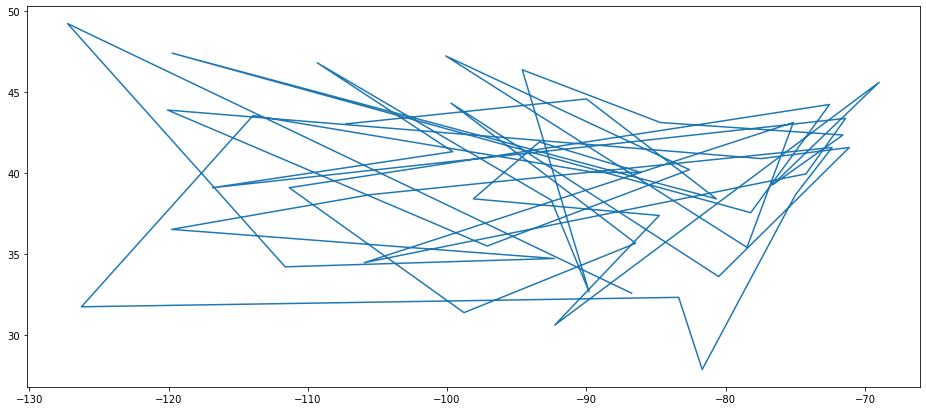

In [16]:
plt.figure(figsize = (16,7))
plt.plot(state_df['x'], state_df['y'])


In [ ]:
### which region has the highest average high school graduation rate of all the states in the region.

<AxesSubplot:xlabel='state.region', ylabel='HS.Grad'>

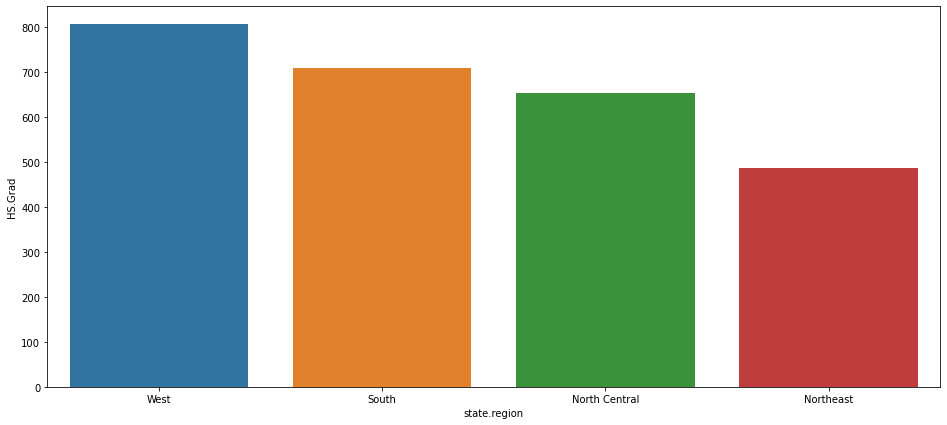

In [17]:
plt.figure(figsize = (16,7))
dta = state_df.groupby(['state.region']).sum()['HS.Grad'].sort_values(ascending = False).reset_index()
sns.barplot(x = 'state.region', y = 'HS.Grad', data = dta)

In [ ]:
### which region has the highest median murder rate

<AxesSubplot:xlabel='state.region', ylabel='Murder'>

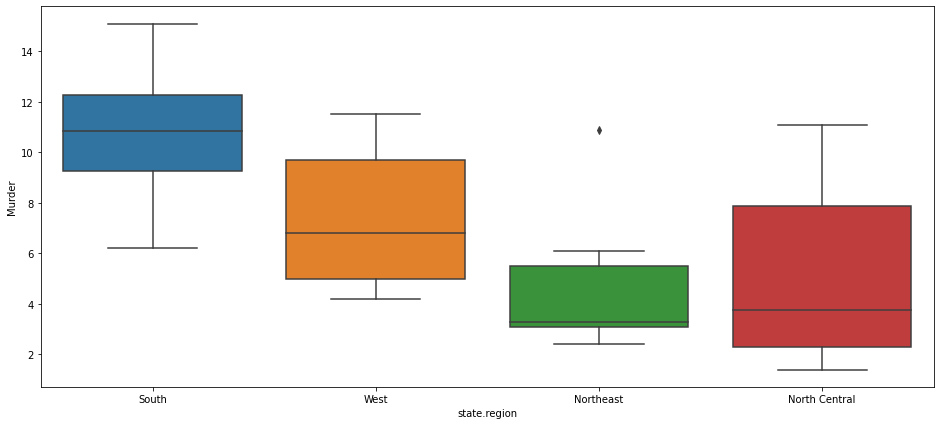

In [22]:
plt.figure(figsize = (16,7))
sns.boxplot(x = 'state.region', y = 'Murder', data = state_df)

You can see, Northest region has an outlier. We will check in which state the outlier is there in the northest region.

<AxesSubplot:xlabel='state.name', ylabel='Murder'>

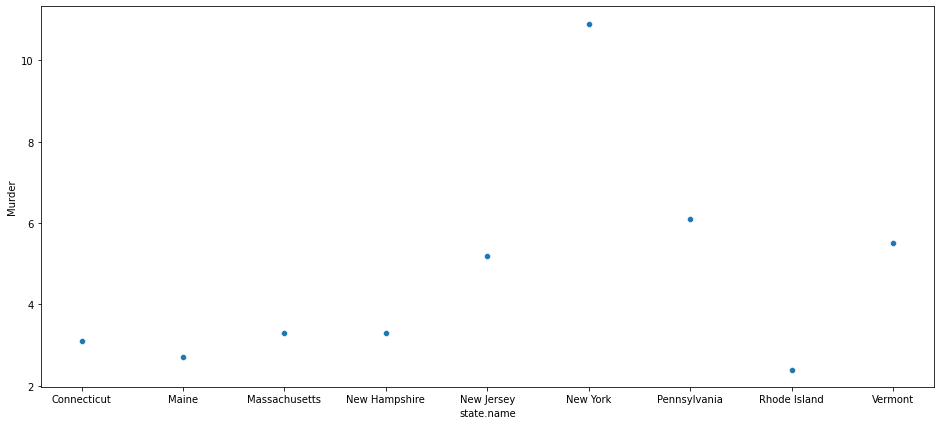

In [34]:
plt.figure(figsize = (16,7))
data = state_df.loc[state_df['state.region'] == 'Northeast']
sns.scatterplot(x = 'state.name', y = 'Murder', data = data)

<AxesSubplot:xlabel='Income', ylabel='Life.Exp'>

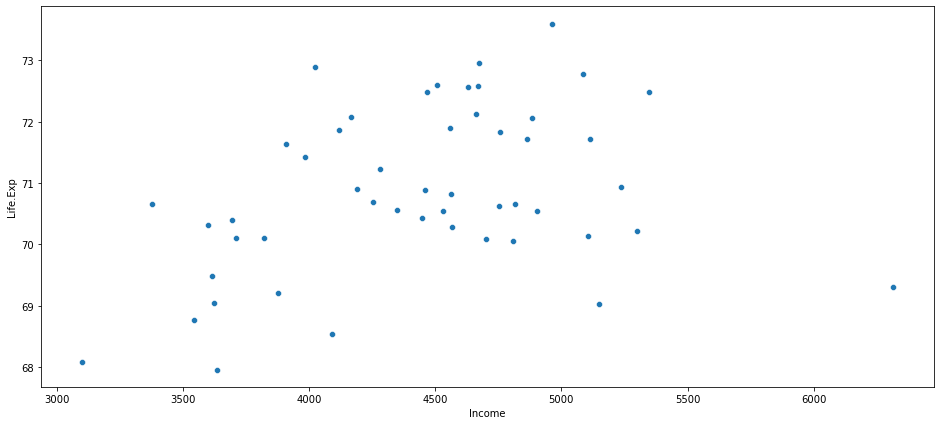

In [125]:
plt.figure(figsize = (16,7))
sns.scatterplot(x = state_df['Income'], y = state_df['Life.Exp'])

Here we can conclude that Life expectancy is positively correlated with income.

###### Now we will create linear regression model to predict life expectancy by state. Here, Dependent variable is Life.Exp and independent variables are Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area

In [80]:
x = state_df.drop(['Life.Exp', 'state.abb', 'state.area', 'x', 'y', 'state.division', 'state.name', 'state.region'], axis = 1)
x

,Population,Income,Illiteracy,Murder,HS.Grad,Frost,Area
0,3615,3624,2.1,15.1,41.3,20,50708
1,365,6315,1.5,11.3,66.7,152,566432
2,2212,4530,1.8,7.8,58.1,15,113417
3,2110,3378,1.9,10.1,39.9,65,51945
4,21198,5114,1.1,10.3,62.6,20,156361
5,2541,4884,0.7,6.8,63.9,166,103766
6,3100,5348,1.1,3.1,56.0,139,4862
7,579,4809,0.9,6.2,54.6,103,1982
8,8277,4815,1.3,10.7,52.6,11,54090
9,4931,4091,2.0,13.9,40.6,60,58073


In [81]:
y = state_df['Life.Exp']
y

0     69.05
1     69.31
2     70.55
3     70.66
4     71.71
5     72.06
6     72.48
7     70.06
8     70.66
9     68.54
10    73.60
11    71.87
12    70.14
13    70.88
14    72.56
15    72.58
16    70.10
17    68.76
18    70.39
19    70.22
20    71.83
21    70.63
22    72.96
23    68.09
24    70.69
25    70.56
26    72.60
27    69.03
28    71.23
29    70.93
30    70.32
31    70.55
32    69.21
33    72.78
34    70.82
35    71.42
36    72.13
37    70.43
38    71.90
39    67.96
40    72.08
41    70.11
42    70.90
43    72.90
44    71.64
45    70.08
46    71.72
47    69.48
48    72.48
49    70.29
Name: Life.Exp, dtype: float64

In [117]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = False)

In [118]:
X_train, X_test

(    Population  Income  Illiteracy  Murder  HS.Grad  Frost    Area
 0         3615    3624         2.1    15.1     41.3     20   50708
 1          365    6315         1.5    11.3     66.7    152  566432
 2         2212    4530         1.8     7.8     58.1     15  113417
 3         2110    3378         1.9    10.1     39.9     65   51945
 4        21198    5114         1.1    10.3     62.6     20  156361
 5         2541    4884         0.7     6.8     63.9    166  103766
 6         3100    5348         1.1     3.1     56.0    139    4862
 7          579    4809         0.9     6.2     54.6    103    1982
 8         8277    4815         1.3    10.7     52.6     11   54090
 9         4931    4091         2.0    13.9     40.6     60   58073
 10         868    4963         1.9     6.2     61.9      0    6425
 11         813    4119         0.6     5.3     59.5    126   82677
 12       11197    5107         0.9    10.3     52.6    127   55748
 13        5313    4458         0.7     7.1     

In [119]:
import statsmodels.api as sm

In [120]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Life.Exp   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     12.91
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           2.07e-07
Time:                        11:46:59   Log-Likelihood:                -36.924
No. Observations:                  37   AIC:                             89.85
Df Residuals:                      29   BIC:                             102.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4850      1.973     36.227      0.0

C:\Users\dhrup\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### In this model income is insignificant variable having p-value greater than 0.05. But as shown in the income and life expectancy graph above, It is showing life expectancy is positively correlated with income. Meaning income does not add statistically significant explanatory power to the model. Hence, it could be the issue of multicollinearity. 

###### Therefore, to improve the model we will remove unnecessary features. To do so, we will remove the features having highest p-value. In the above model Income, Illiteracy, and Area has the highet p-value. So we will exclude that features

In [142]:
x1 = state_df[['Population', 'Murder', 'HS.Grad', 'Frost']]
x1

,Population,Murder,HS.Grad,Frost
0,3615,15.1,41.3,20
1,365,11.3,66.7,152
2,2212,7.8,58.1,15
3,2110,10.1,39.9,65
4,21198,10.3,62.6,20
5,2541,6.8,63.9,166
6,3100,3.1,56.0,139
7,579,6.2,54.6,103
8,8277,10.7,52.6,11
9,4931,13.9,40.6,60


In [143]:
y1 = state_df['Life.Exp']
y1

0     69.05
1     69.31
2     70.55
3     70.66
4     71.71
5     72.06
6     72.48
7     70.06
8     70.66
9     68.54
10    73.60
11    71.87
12    70.14
13    70.88
14    72.56
15    72.58
16    70.10
17    68.76
18    70.39
19    70.22
20    71.83
21    70.63
22    72.96
23    68.09
24    70.69
25    70.56
26    72.60
27    69.03
28    71.23
29    70.93
30    70.32
31    70.55
32    69.21
33    72.78
34    70.82
35    71.42
36    72.13
37    70.43
38    71.90
39    67.96
40    72.08
41    70.11
42    70.90
43    72.90
44    71.64
45    70.08
46    71.72
47    69.48
48    72.48
49    70.29
Name: Life.Exp, dtype: float64

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, shuffle = False)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Life.Exp   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     22.33
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           1.24e-08
Time:                        14:16:23   Log-Likelihood:                -35.958
No. Observations:                  35   AIC:                             81.92
Df Residuals:                      30   BIC:                             89.69
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.8099      1.193     60.202      0.0

C:\Users\dhrup\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### By reducing the features, model is getting worse. But this project was for the learning purpose. Hence, we are not focusing on the accuracyof the model.